### Implementing Linear Regression with Categorical variable Using Sklearn

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get Path
path = 'C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/FilterData3.csv'

# Reading the dataset
df = pd.read_csv(path)
display(df)

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Category,Leather_interior,Fuel_type,Mileage,Engine_volume,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,11219,20746880,157,0,0.046772,1939,Limousine,Yes,Petrol,126000,2.400000,4,Automatic,Rear,4-5,Left wheel,White,0
1,13225,23242980,200,0,0.141307,2017,Jeep,Yes,Petrol,95000,2.700000,4,Automatic,Front-Rear,5,Left wheel,Black,10
2,13572,24367759,85702,0,0.299423,2013,Microbus,Yes,Diesel,225000,3.861956,6,Manual,Rear,2-3,Left wheel,White,4
3,3643,24701923,130,0,0.058867,2006,Jeep,Yes,Petrol,90000,4.400000,8,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
4,5509,24940334,25089,0,0.057150,1999,Limousine,Yes,Petrol,99000,5.400000,8,Automatic,Front-Rear,4-5,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19212,14885,45816647,15053,0,0.035492,2010,Hatchback,No,Petrol,83000,2.000000,4,Automatic,Front,5,Left wheel,Golden,6
19213,710,45816648,24148,810,0.075149,2016,Hatchback,No,Petrol,10200,1.800000,4,Automatic,Front,4-5,Left wheel,White,10
19214,2168,45816650,20698,697,0.075149,2015,Hatchback,No,Petrol,78000,1.800000,4,Manual,Front,4-5,Left wheel,Silver,10
19215,12245,45816651,10976,0,0.025909,2007,Sedan,Yes,Petrol,224823,3.510869,4,Tiptronic,Front-Rear,4-5,Left wheel,White,0


In [3]:
df.shape
df.describe()

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Mileage,Engine_volume,Cylinders,Airbags
count,19217.000000,1.921700e+04,19217.000000,19217.000000,19217.000000,19217.000000,1.921700e+04,19217.000000,19217.000000,19217.000000
mean,9618.009887,4.557636e+07,17128.202061,632.751782,0.057377,2010.913670,1.421973e+06,2.479367,4.582453,6.583286
std,5553.556104,9.370593e+05,18279.641947,567.652166,0.040567,5.666155,4.588801e+07,1.068608,1.198624,4.319785
min,0.000000,2.074688e+07,6.000000,0.000000,0.000000,1939.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,4808.000000,4.569837e+07,5331.000000,0.000000,0.035710,2009.000000,7.019400e+04,1.800000,4.000000,4.000000
50%,9618.000000,4.577234e+07,13172.000000,642.000000,0.047439,2012.000000,1.260210e+05,2.000000,4.000000,6.000000
75%,14426.000000,4.580204e+07,22110.000000,917.000000,0.066120,2015.000000,1.888880e+05,3.000000,4.000000,12.000000
max,19236.000000,4.581665e+07,308906.000000,11714.000000,0.999886,2020.000000,2.147484e+09,20.000000,16.000000,16.000000


In [4]:
df.dtypes

Unnamed: 0            int64
ID                    int64
Price                 int64
Levy                  int64
MakeModel           float64
Prod_year             int64
Category             object
Leather_interior     object
Fuel_type            object
Mileage               int64
Engine_volume       float64
Cylinders             int64
Gear_box_type        object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

from the above output we can see if the dataset is following normal distribution

In [5]:
# independent variables
X = df[['Levy','MakeModel','Prod_year','Category','Leather_interior','Fuel_type','Mileage','Engine_volume','Cylinders','Gear_box_type','Drive_wheels','Doors','Wheel','Color','Airbags']]

In [6]:
X = pd.get_dummies(data=X, drop_first=True) # creating a dummy variable
X.head()

,Levy,MakeModel,Prod_year,Mileage,Engine_volume,Cylinders,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0.046772,1939,126000,2.400000,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.141307,2017,95000,2.700000,4,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.299423,2013,225000,3.861956,6,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.058867,2006,90000,4.400000,8,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.057150,1999,99000,5.400000,8,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Regression results are easier to interpret when dummy variables are limited to two specidic values, 1 or 0. 1 represents the presence of qualitative attribute, and 0 represents the absence

In [7]:
# dependent variable
Y = df['Price']

In [8]:
# creating a train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13451, 47)
(5766, 47)
(13451,)
(5766,)


In [9]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# print the intercept
print(model.intercept_)

-1889774.043681832


In [11]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Levy,-2.504613e+00
MakeModel,2.465659e+05
Prod_year,9.467128e+02
Mileage,6.477146e-07
Engine_volume,2.470109e+03
Cylinders,-4.618217e+02
Airbags,-3.853729e+02
Category_Coupe,-5.478890e+03
Category_Goods wagon,-1.020015e+04
Category_Hatchback,-6.594203e+03


Positive sign indicates that as the predictor variable increases, the target variable also increases.
$\newline$
Negative sign indicates that as the predictor variable increases, the target variable dectreases

In [12]:
# predicted variable
predictions = model.predict(X_test)
predictions

array([ 8241.53657265, 26390.77912694, 30672.4740071 , ...,
        5381.73717041, 25613.79114204, 43738.27012917])

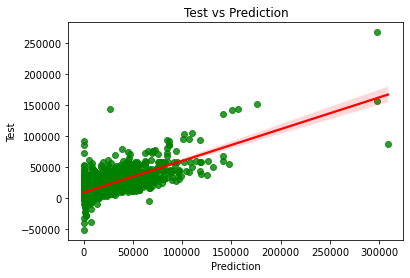

In [28]:
plt.title("Test vs Prediction")
ax = sns.regplot(y_test,predictions,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.xlabel("Prediction")
plt.ylabel("Test")
plt.show()

The graph above shows our model is predicting good results.

In [14]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     308.3
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:57:23   Log-Likelihood:            -1.4611e+05
No. Observations:               13451   AIC:                         2.923e+05
Df Residuals:                   13403   BIC:                         2.927e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We Use adjusted R-squared to compare the goodness-of-fit for regression models that contain different numbers of independent variables.
out R-squared: 0.519 and Adj. R-squared: 0.518, therefor our R-squared is a moderate fit.
$\newline$
The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.